# Lead scoring

In [1]:
# importing common modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
# import dataset
leadScrDf=pd.read_csv("Leads.csv")
leadScrDf.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# check for duplicates
len(leadScrDf[leadScrDf.duplicated()])

0

In [4]:
#drop ID columns, because they don't add any value to our analysis
# We'll drop is as soon as possible, so we don't waste our compute on something we don't need
leadScrDf=leadScrDf.drop(["Prospect ID","Lead Number"],axis=1)
leadScrDf.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leadScrDf.shape

(9240, 35)

In [6]:
leadScrDf.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leadScrDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [8]:
for col in leadScrDf.columns:
    print(leadScrDf[col].value_counts())
    print(f"Nulls : {(leadScrDf[col].isna().mean())*100} %\n")

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Nulls : 0.0 %

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
Nulls : 0.38961038961038963 %

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
Nulls : 0.0 %

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
Nulls : 0.0 %

Converted
0    56

In [9]:
# categorcal vs continous
#we'll take a column to be categorical if it's unique count is below 30
catCols=[col for col in leadScrDf.columns if len(leadScrDf[col].unique())<=30]
contCols=[col for col in leadScrDf.columns if len(leadScrDf[col].unique())>30]
print(catCols,'\n', contCols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'] 
 ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Country']


In [10]:
catCols.append('Country')
contCols.remove('Country')

In [11]:
#Now we'll handle the nulls
#first we'll check for things like "Select" in any column
# from previous results we know 4 columns consist of such value
for i in ['Specialization','How did you hear about X Education','Lead Profile','City']:
    nullPrt=leadScrDf[i].isna().mean()*100
    selPrt=(leadScrDf[i]=='Select').mean()*100
    print(i)
    print(f"'Select' percentage: {selPrt}%")
    print(f"'NULL' percentage: {nullPrt}%")
    print(f"Sum of above: {selPrt+nullPrt}%\n")

Specialization
'Select' percentage: 21.017316017316016%
'NULL' percentage: 15.562770562770561%
Sum of above: 36.58008658008658%

How did you hear about X Education
'Select' percentage: 54.57792207792208%
'NULL' percentage: 23.885281385281385%
Sum of above: 78.46320346320347%

Lead Profile
'Select' percentage: 44.87012987012987%
'NULL' percentage: 29.318181818181817%
Sum of above: 74.18831168831169%

City
'Select' percentage: 24.339826839826838%
'NULL' percentage: 15.367965367965366%
Sum of above: 39.7077922077922%



### Specialization
 * The "Select" could be because the lead might not feel that filling the not madatory fields might be a waste of time
 * It could be because the lead might not want to disclose it
 * But we'll keep it and remove the NULLs because the nulls are produced completely at random, I can say so because inspite having a drop down which is 'Select' by default, there are NULLs
 * we'll keep the column because a certain industry can have a big impact on if the person is a lead or not
 * Also, we'll see how significat this model is down the line
 * We can even argue that a person who didn't select any of the profile is not serious about the course and just window shopping.
 * Also, they could be outside the industries which we usually server, which could be outside our market, which reduces our probablity.

### How did you hear about X Education
 * Although how a person got to us plays a major factor, example, a recommendation from friend could make a person have a certain bais, but with more that 70% values that are uncertain, we can't make any sense of such a column, so we'll drop it.

### Lead Profile
 * Same as "How did you hear about X Education", we'll drop this as well

### City
 * This column could play a major role, since it's usually the case that a person who lives in an industrial area might want to upskill.
 * We'll keep the column
 * We'll see how significat this column turns out to be down the line 

In [12]:
leadScrDf=leadScrDf.drop(["How did you hear about X Education","Lead Profile"],axis=1)
leadScrDf.shape

(9240, 33)

In [13]:
catCols.remove("How did you hear about X Education")
catCols.remove("Lead Profile")

In [14]:
#lets check out the columns containing nulls
print("Nulls in Categorical columns:")
for col in catCols:
    nullCnt=leadScrDf[col].isna().mean()
    if nullCnt>0:
        print(f"{col} : {nullCnt*100} %")

print("\n")

print("Nulls in Continous columns:")
for col in contCols:
    nullCnt=leadScrDf[col].isna().mean()
    if nullCnt>0:
        print(f"{col} : {nullCnt*100} %")

Nulls in Categorical columns:
Lead Source : 0.38961038961038963 %
Last Activity : 1.1147186147186148 %
Specialization : 15.562770562770561 %
What is your current occupation : 29.11255411255411 %
What matters most to you in choosing a course : 29.318181818181817 %
Tags : 36.28787878787879 %
Lead Quality : 51.590909090909086 %
City : 15.367965367965366 %
Asymmetrique Activity Index : 45.64935064935065 %
Asymmetrique Profile Index : 45.64935064935065 %
Asymmetrique Activity Score : 45.64935064935065 %
Asymmetrique Profile Score : 45.64935064935065 %
Country : 26.634199134199132 %


Nulls in Continous columns:
TotalVisits : 1.4826839826839828 %
Page Views Per Visit : 1.4826839826839828 %


In [15]:
# There are a few columns with a lot of nulls
# these columns won't produce any significant value
# We'll drop columns with Nulls more 40%
# not dropping Tags, because it holds a significant business value.
dropped=[]
for col in catCols:
    nullCnt=leadScrDf[col].isna().mean()
    if nullCnt>0.4:
        leadScrDf=leadScrDf.drop(col,axis=1)
        dropped.append(col)

for i in dropped:
    catCols.remove(i)
        

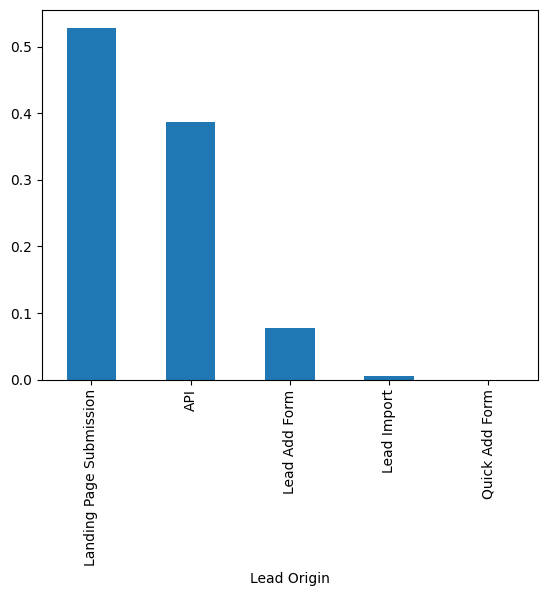

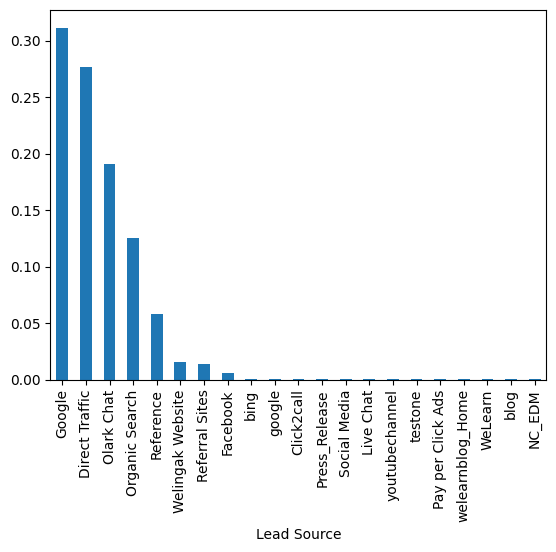

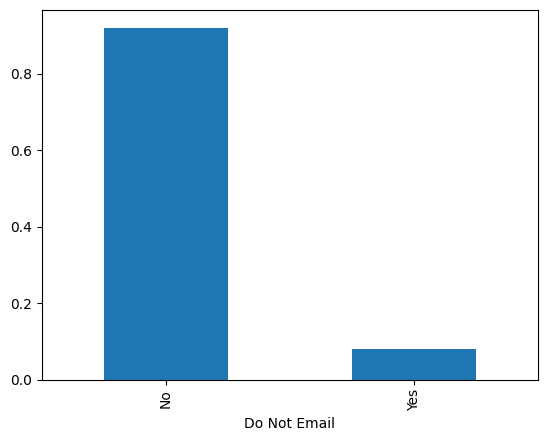

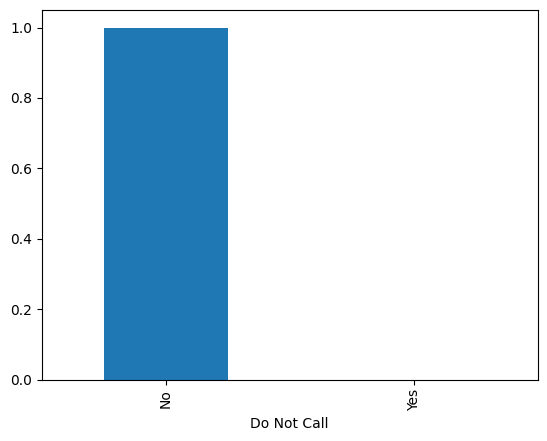

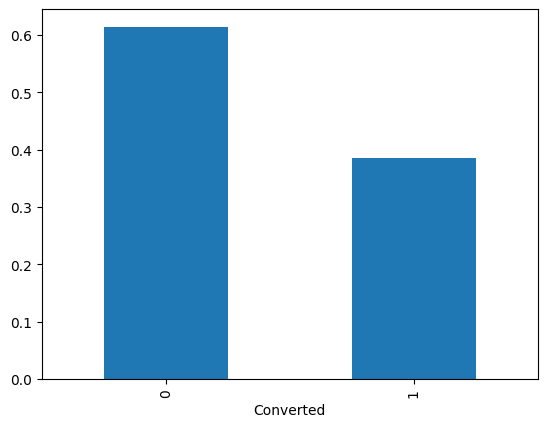

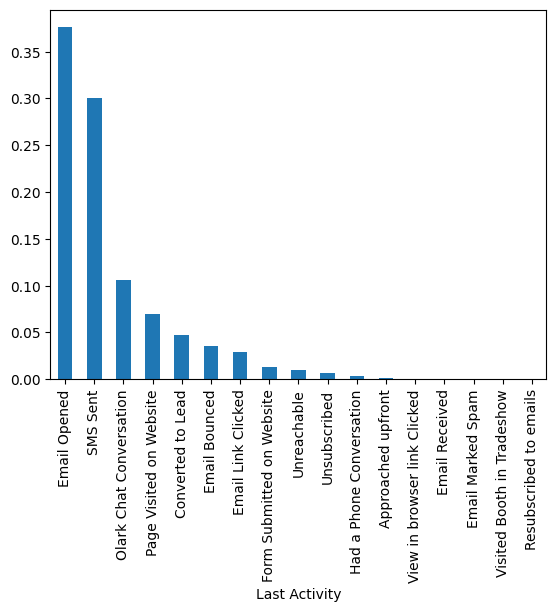

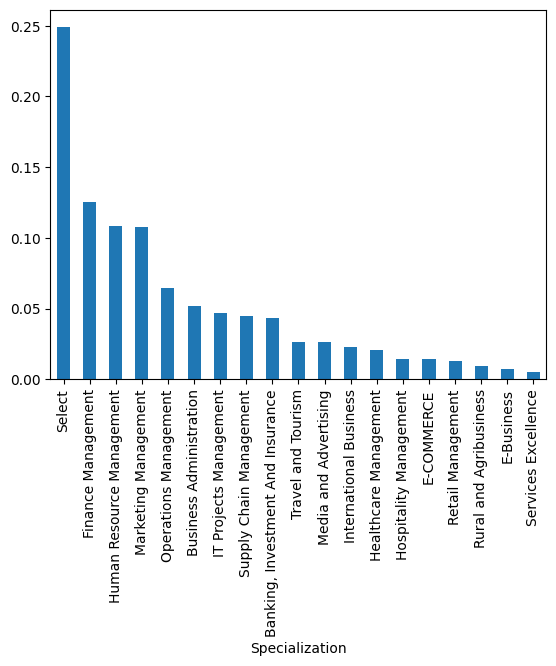

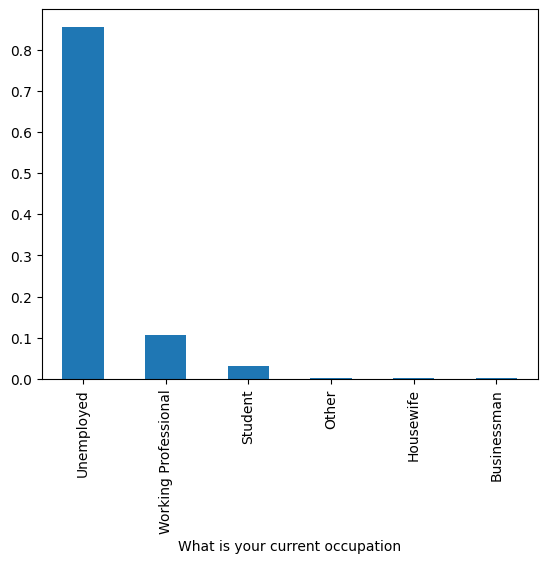

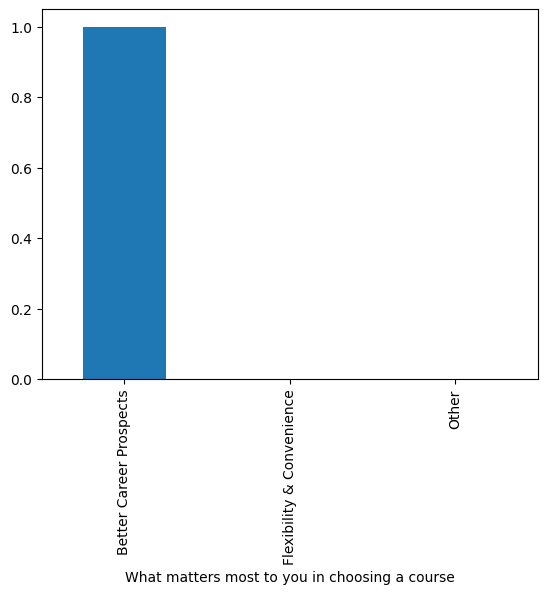

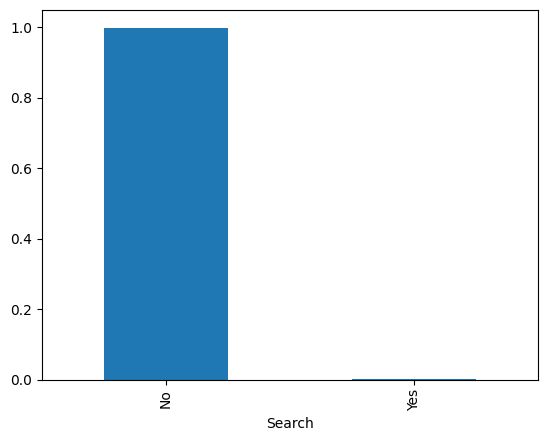

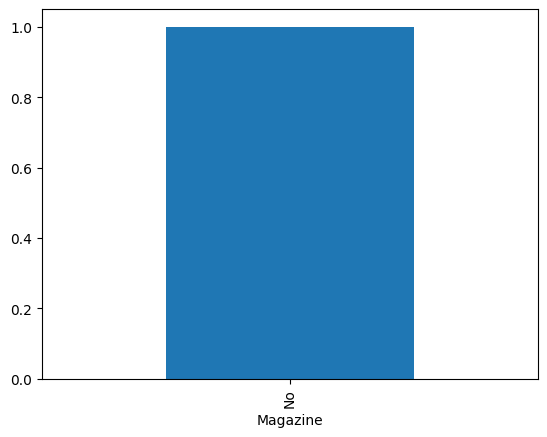

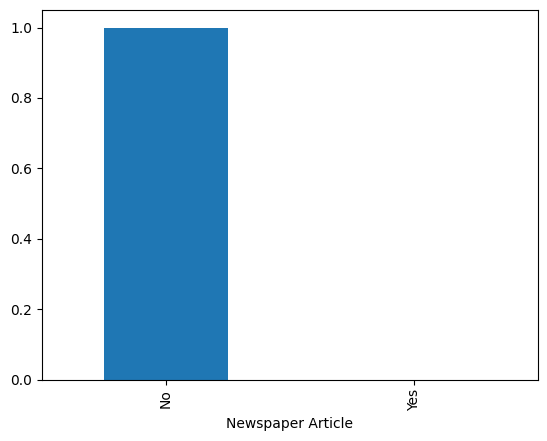

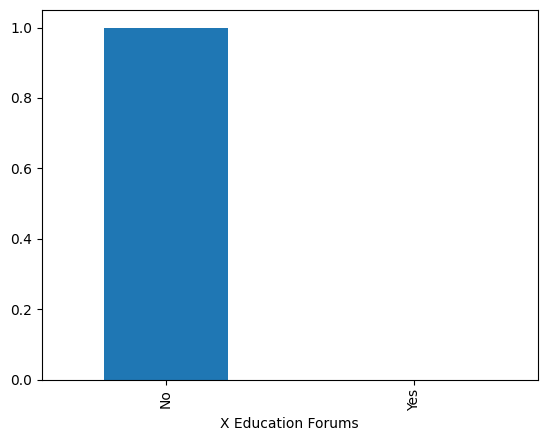

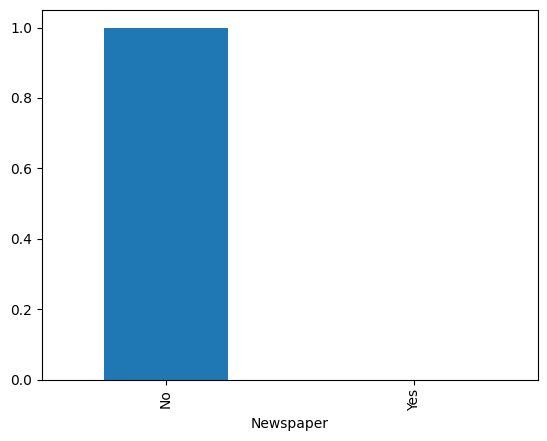

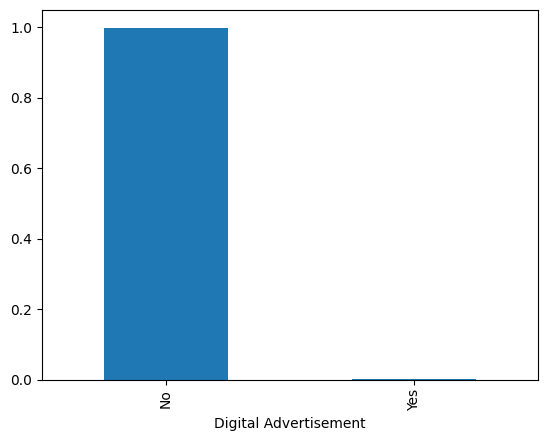

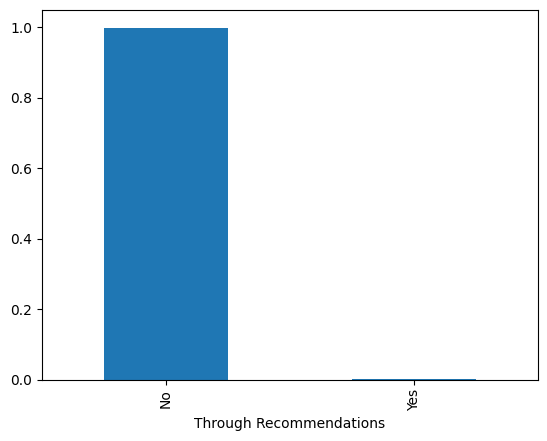

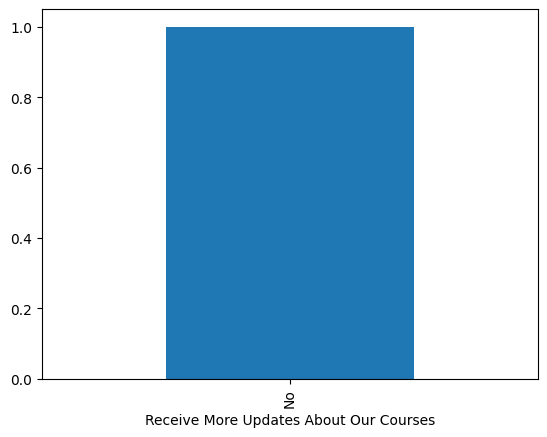

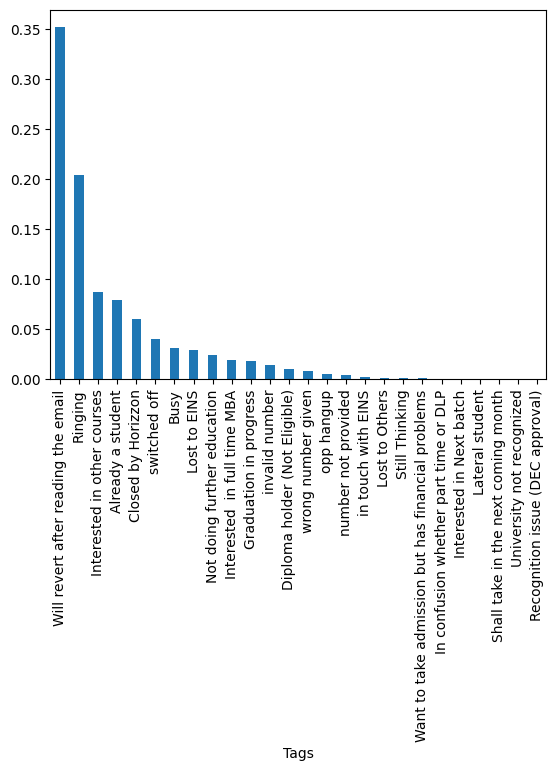

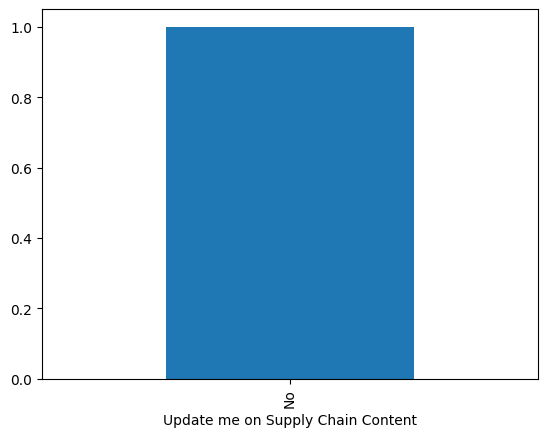

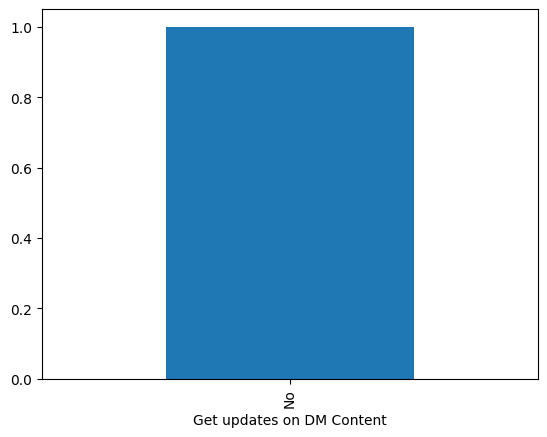

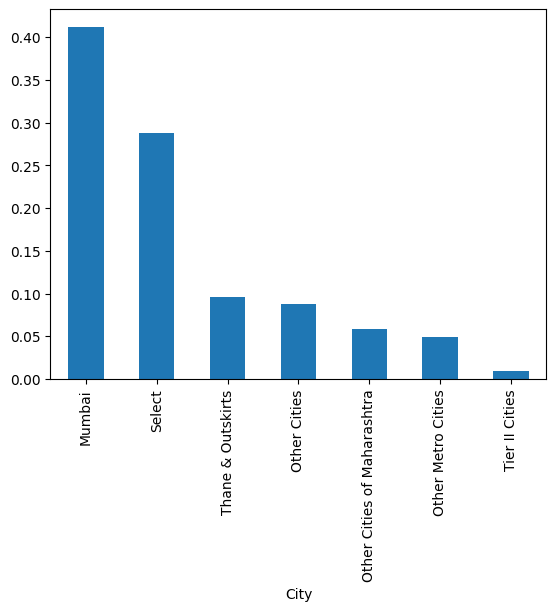

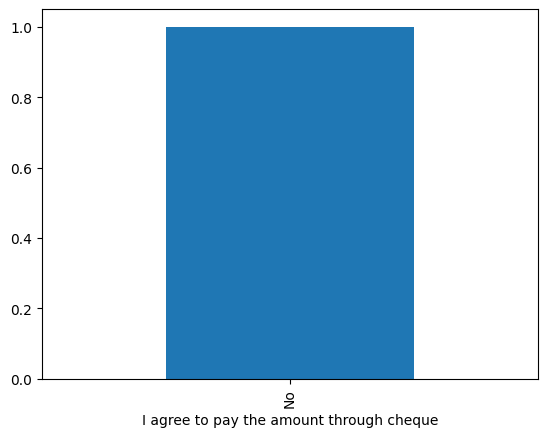

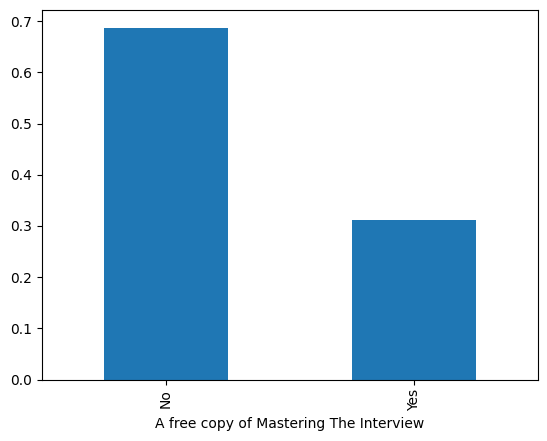

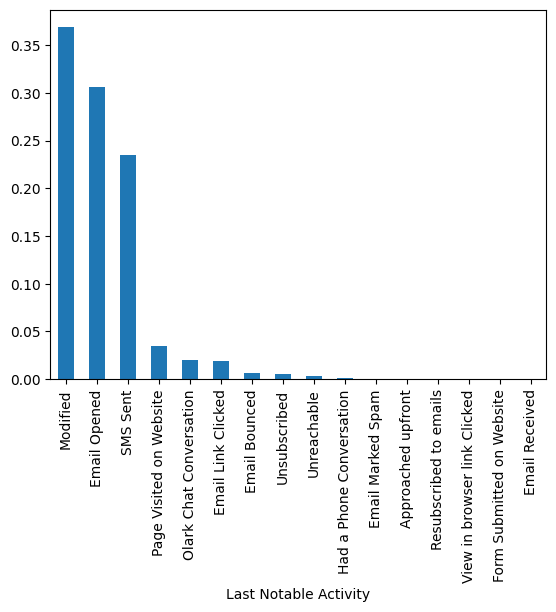

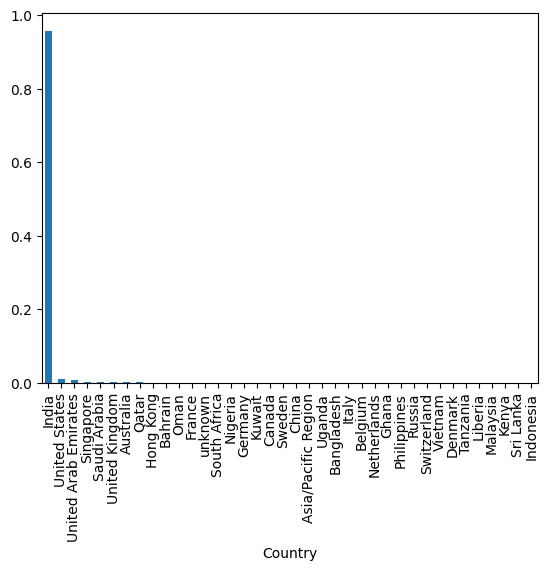

In [16]:
for col in catCols:
    leadScrDf[col].value_counts(normalize=True).plot.bar()
    plt.show()

In [17]:
# we can see that in Lead Source Google and goolge are 2 different things
# Also, in Tags invalid number and wrong number given are the same thing
# So, we'll fix this
leadScrDf['Lead Source'] = leadScrDf['Lead Source'].replace('google', 'Google')
leadScrDf['Tags'] = leadScrDf['Tags'].replace('wrong number given', 'invalid number')


### Bias observation
* All the above observations goes on to show that a customer doesn't like follow-ups.
* Also, the bias about the reasons for choosing the course is heavely biased towards having better careers
* No marketing brings the customer to us, this could be because they don't directly come from there, but may be indirectly.
* Also, most of our customer base is Indian. We won't need this column as well as it is very biased.

In [18]:
# From the graph above, we can see that
# There are multple columns with enormous abouts of bias, these columns don't hold any value to us
# We will drop any column that have these extreme biases
biasedCols=['I agree to pay the amount through cheque','Get updates on DM Content',
            'Update me on Supply Chain Content','Receive More Updates About Our Courses',
            'Through Recommendations',"X Education Forums", 'Newspaper', 'Digital Advertisement',
            'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article','Do Not Call','Country']

for col in biasedCols:
    leadScrDf=leadScrDf.drop(col,axis=1)
    catCols.remove(col)

In [19]:
#lets check out the columns containing nulls
print("Nulls in Categorical columns:")
for col in catCols:
    nullCnt=leadScrDf[col].isna().mean()
    if nullCnt>0:
        print(f"{col} : {nullCnt*100} %")

print("\n")

print("Nulls in Continous columns:")
for col in contCols:
    nullCnt=leadScrDf[col].isna().mean()
    if nullCnt>0:
        print(f"{col} : {nullCnt*100} %")

Nulls in Categorical columns:
Lead Source : 0.38961038961038963 %
Last Activity : 1.1147186147186148 %
Specialization : 15.562770562770561 %
What is your current occupation : 29.11255411255411 %
Tags : 36.28787878787879 %
City : 15.367965367965366 %


Nulls in Continous columns:
TotalVisits : 1.4826839826839828 %
Page Views Per Visit : 1.4826839826839828 %


Here, we'll choose to drop the highest NaNs from the Categorical columns
So, we'll drop Tags
After that, we'll impute the second highest column to "Select", because, we could say nulls are similar to "Select"

In [20]:
leadScrDf=leadScrDf.drop(["Tags"],axis=1)

In [21]:
leadScrDf.shape

(9240, 13)

In [22]:
catCols.remove("Tags")

In [23]:
# Now, let's fill the left out values with mode in case of catagorical columns
for col in catCols:
    leadScrDf[col].fillna(leadScrDf[col].mode()[0],inplace=True)

C:\Users\Nikhilesh\AppData\Local\Temp\ipykernel_12696\1171065259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  leadScrDf[col].fillna(leadScrDf[col].mode()[0],inplace=True)
C:\Users\Nikhilesh\AppData\Local\Temp\ipykernel_12696\1171065259.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [24]:
# all the NaNs are handled in the categorical columns
# Now let's check continous columns
print("Nulls in Continous columns:")
for col in contCols:
    nullCnt=leadScrDf[col].isna().sum()
    if nullCnt>0:
        print(f"{col} : {nullCnt}")

Nulls in Continous columns:
TotalVisits : 137
Page Views Per Visit : 137


In [25]:
# We have around 6 thousand entires
# So, we can replace these with 50 percentile without creating a bias
for col in contCols:
    leadScrDf[col].fillna(leadScrDf[col].quantile(.5),inplace=True)

C:\Users\Nikhilesh\AppData\Local\Temp\ipykernel_12696\2491573254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  leadScrDf[col].fillna(leadScrDf[col].quantile(.5),inplace=True)
C:\Users\Nikhilesh\AppData\Local\Temp\ipykernel_12696\2491573254.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [26]:
# Encoding
for col in ["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation","City","Last Notable Activity"]:
    res=pd.get_dummies(leadScrDf[col],dtype=int,prefix=col)
    leadScrDf = pd.concat([leadScrDf, res], axis=1)
    leadScrDf=leadScrDf.drop(col,axis=1)

In [27]:
# we will see two columns 'Specialization_Select','City_Select' which will come handy
# in getting some prior info in the data
# But we will remove them before putting it in the ML model for training
# Because having them will increase compute requirements and won't increase any insites.
list(leadScrDf.columns)

['Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'A free copy of Mastering The Interview',
 'Lead Origin_API',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Click2call',
 'Lead Source_Direct Traffic',
 'Lead Source_Facebook',
 'Lead Source_Google',
 'Lead Source_Live Chat',
 'Lead Source_NC_EDM',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Pay per Click Ads',
 'Lead Source_Press_Release',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',
 'Lead Source_WeLearn',
 'Lead Source_Welingak Website',
 'Lead Source_bing',
 'Lead Source_blog',
 'Lead Source_testone',
 'Lead Source_welearnblog_Home',
 'Lead Source_youtubechannel',
 'Last Activity_Approached upfront',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activ

In [28]:
leadScrDf[["A free copy of Mastering The Interview","Do Not Email"]]

,A free copy of Mastering The Interview,Do Not Email
0,No,No
1,No,No
2,Yes,No
3,No,No
4,No,No
...,...,...
9235,No,Yes
9236,Yes,No
9237,Yes,Yes
9238,No,No


In [29]:
leadScrDf

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,No,0,0.0,0,0.00,No,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,No,0,5.0,674,2.50,No,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,No,1,2.0,1532,2.00,Yes,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,No,0,1.0,305,1.00,No,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,No,1,2.0,1428,1.00,No,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,

In [30]:
# updating values to numerical format
leadScrDf['A free copy of Mastering The Interview'] = leadScrDf['A free copy of Mastering The Interview'].replace('Yes', 1)
leadScrDf['A free copy of Mastering The Interview'] = leadScrDf['A free copy of Mastering The Interview'].replace('No', 0)

leadScrDf['Do Not Email'] = leadScrDf['Do Not Email'].replace('Yes', 1)
leadScrDf['Do Not Email'] = leadScrDf['Do Not Email'].replace('No', 0)


C:\Users\Nikhilesh\AppData\Local\Temp\ipykernel_12696\2503360787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  leadScrDf['A free copy of Mastering The Interview'] = leadScrDf['A free copy of Mastering The Interview'].replace('No', 0)
C:\Users\Nikhilesh\AppData\Local\Temp\ipykernel_12696\2503360787.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  leadScrDf['Do Not Email'] = leadScrDf['Do Not Email'].replace('No', 0)


In [31]:
leadScrDf.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000

We can see that we have 3 columns that are numerical in nature
Let's analyse these as well

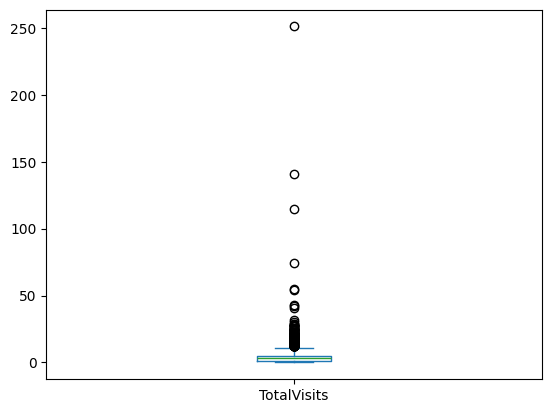

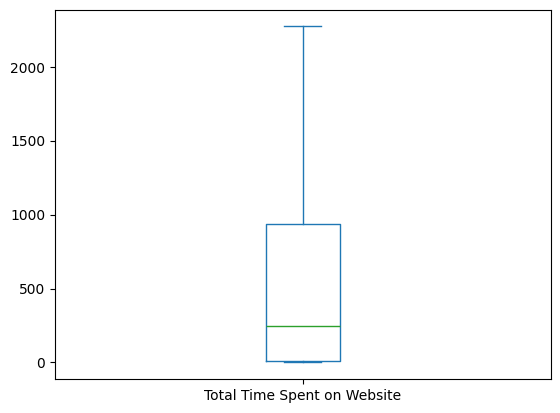

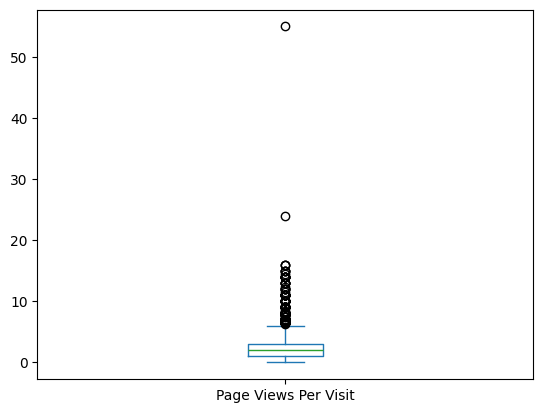

In [32]:
leadScrDf['TotalVisits'].plot.box()
plt.show()

leadScrDf['Total Time Spent on Website'].plot.box()
plt.show()

leadScrDf['Page Views Per Visit'].plot.box()
plt.show()

In [33]:
# Checking outliers
print("Page Views Per Visit outliers:")
print(leadScrDf['Page Views Per Visit'].quantile(.75))
print(leadScrDf['Page Views Per Visit'].quantile(.95))
print(leadScrDf['Page Views Per Visit'].quantile(.99))
print(leadScrDf['Page Views Per Visit'].max())


print("TotalVisits outliers:")
print(leadScrDf['TotalVisits'].quantile(.75))
print(leadScrDf['TotalVisits'].quantile(.95))
print(leadScrDf['TotalVisits'].quantile(.99))
print(leadScrDf['TotalVisits'].quantile(.97))
print(leadScrDf['TotalVisits'].max())

Page Views Per Visit outliers:
3.0
6.0
9.0
55.0
TotalVisits outliers:
5.0
10.0
17.0
11.0
251.0


In [34]:
#From the other observations, we can see that "Page Views Per Visit" has outliers but it wouldn't affect the model a lot
# But, the outliers in TotalVisits is not acceptable, hence, we will put a cap on it at .97
def capping(vl):
    if vl>12:
        return 12
    return vl
leadScrDf['TotalVisits']=leadScrDf['TotalVisits'].apply(capping)

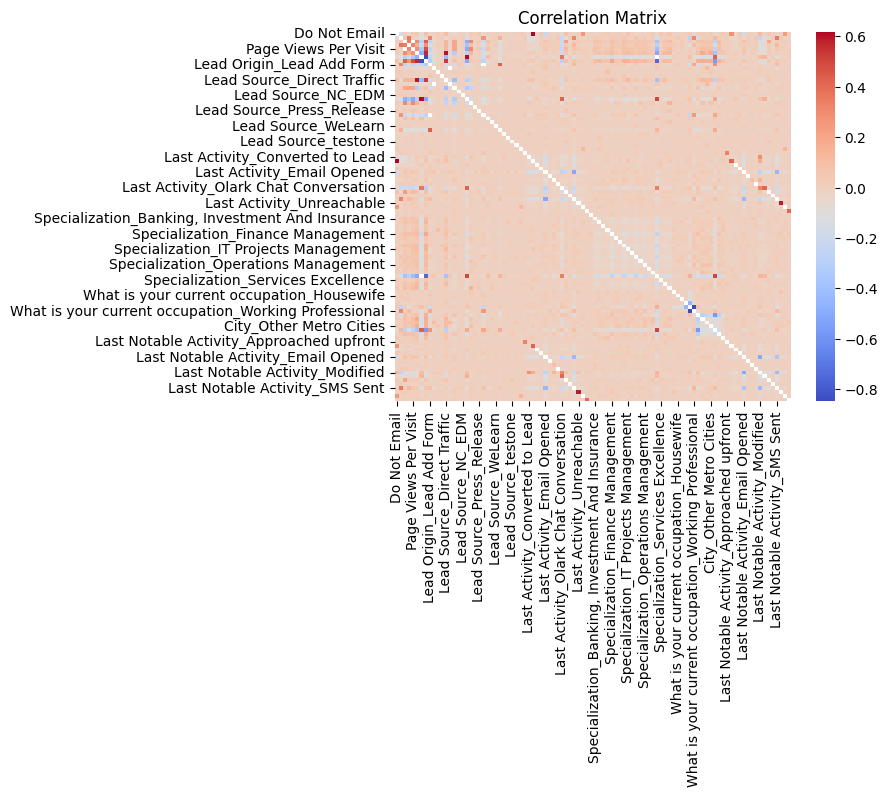

<Figure size 3000x1800 with 0 Axes>

In [35]:
# Now that we've checked all the columns individually, let's check their correlation
# let's plot a correlation matrix
correlation_matrix = leadScrDf.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',mask=correlation_matrix>0.65)
plt.title('Correlation Matrix')
plt.figure(figsize=(30, 18))
plt.show()

We can't tell anything from a graph like this, so we'll use a workaround.
We know that the matix is repetative after some time, ie we get duplicates like correlation for (a,b) and (b,a) which is the same thing
So, we'll invert the index and cut off first half of the columns and first half of the index. So we'll cover all the attributes and make a more visible correlation matix

In [36]:
correlation_matrix.shape

(96, 96)

In [37]:
correlation_matrix = correlation_matrix.iloc[::-1]

In [38]:
correlation_matrix

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Last Notable Activity_View in browser link Clicked,-0.003056,-0.008238,0.016807,-0.007569,0.001516,0.015429,0.013081,-0.011021,-0.003020,-0.000805,-0.000108,-0.000217,-0.006411,-0.000805,0.015348,-0.000153,-0.000108,-0.005038,-0.003930,-0.000108,-0.000153,-0.002577,-0.001218,-0.000153,-0.000108,-0.001300,-0.000265,-0.000108,-0.000108,-0.000108,-0.000108,-0.000325,-0.002293,-0.001990,-0.001795,-0.000153,-0.008199,-0.000153,-0.001173,-0.000594,-0.003569,-0.002838,-0.000108,-0.006763,-0.001049,-0.000848,0.408138,-0.000108,-0.002027,-0.002222,-0.000820,-0.001152,0.030273,-0.001377,-0.001163,-0.003307,-0.002113,-0.001458,-0.003286,-0.001559,-0.002496,-0.001088,-0.000928,-0.007901,-0.000686,-0.002061,-0.001559,-0.000306,-0.000342,-0.000433,-0.001587,0.003522,-0.002992,-0.010453,-0.002946,0.045609,-0.002155,-0.005901,-0.003097,-0.000935,-0.000108,-0.000841,-0.001437,-0.000153,-0.006907,-0.000108,-0.000108,-0.000405,-0.007951,-0.001479,-0.001964,-0.000108,-0.005767,-0.000613,-0.0

In [39]:
correlation_matrix=correlation_matrix.iloc[:48, :48]
correlation_matrix

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
Last Notable Activity_View in browser link Clicked,-0.003056,-0.008238,0.016807,-0.007569,0.001516,0.015429,0.013081,-0.011021,-0.003020,-0.000805,-0.000108,-0.000217,-0.006411,-0.000805,0.015348,-0.000153,-0.000108,-0.005038,-0.003930,-0.000108,-0.000153,-0.002577,-0.001218,-0.000153,-0.000108,-0.001300,-0.000265,-0.000108,-0.000108,-0.000108,-0.000108,-0.000325,-0.002293,-0.001990,-0.001795,-0.000153,-0.008199,-0.000153,-0.001173,-0.000594,-0.003569,-0.002838,-0.000108,-0.006763,-0.001049,-0.000848,0.408138,-0.000108
Last Notable Activity_Unsubscribed,0.243408,-0.012858,0.006423,0.000503,0.018222,0.020709,-0.010024,0.015686,-0.009389,-0.005533,-0.000744,-0.001488,0.003627,-0.005533,0.003941,-0.001052,-0.000744,-0.011352,0.009802,-0.000744,-0.001052,-0.017708,0.017965,-0.001052,-0.000744,-0.008933,-0.001823,-0.000744,-0.000744,-0.000744,0.145501,-0.002233,-0.015758,-0.013674,-0.012334,-0.001052,-0.056349,-0.001052,-0.008062,-0.004081,-0.024530,-0.019506,-0.000744,-0.046484,-0.007210,0.877108,-0.001823,-0.000744
Last Notable Activity_Unreachable,-0.010505,0.036594,0.013221,0.008941,0.019723,0.003967,-0.001506,0.000291,0.003533,-0.004562,-0.000613,-0.001227,-0.015703,-0.004562,0.011604,-0.000867,-0.000613,-0.009759,0.011164,-0.000613,-0.000867,0.009084,0.009044,-0.000867,-0.000613,-0.007365,-0.001503,-0.000613,-0.000613,-0.000613,-0.000613,-0.001841,-0.012992,-0.011274,-0.010169,-0.000867,-0.046458,-0.000867,-0.006647,-0.003365,-0.020224,-0.016082,-0.000613,-0.038324,0.584642,-0.004806,-0.001503,-0.000613
Last Notable Activity_SMS Sent,-0.025990,0.351845,0.013963,0.125076,0.056851,0.028704,-0.103486,0.057507,0.092690,-0.039579,-0.005767,-0.011536,0.018989,-0.036261,0.007252,0.026543,-0.005767,-0.095999,0.037624,-0.005767,-0.008157,0.065051,-0.045033,-0.008157,-0.005767,0.055233,-0.004112,-0.005767,-0.005767,-0.005767,-0.005767,-0.017309,-0.122170,-0.106012,-0.095624,-0.008157,-0.436864,-0.008157,-0.062505,-0.031638,-0.190180,-0.151225,-0.005767,0.852707,-0.055896,-0.045191,-0.014131,-0.005767
Last Notable Activity_Resubscribed to emails,-0.003056,0.013138,-0.011477,-0.009259,-0.011431,-0.007015,0.013081,-0.011021,-0.003020,-0.000805,-0.000108,-0.000217,-0.006411,-0.000805,-0.007052,-0.000153,-0.000108,0.021485,-0.003930,-0.000108,-0.000153,-0.002577,-0.001218,-0.000153,-0.000108,-0.001300,-0.000265,-0.000108,-0.000108,-0.000108,-0.000108,-0.000325,-0.002293,-0.001990,-0.001795,-0.000153,-0.008199,-0.000153,-0.001173,-0.000594,-0.003569,-0.002838,1.000000,-0.006763,-0.001049,-0.000848,-0.000265,-0.000108
Last Notable Activity_Page Visited on Website,0.049921,-0.036051,0.208140,0.026644,0.027158,0.037921,-0.031938,0.046200,-0.023752,-0.014609,-0.001964,0.024611,0.05

<Axes: >

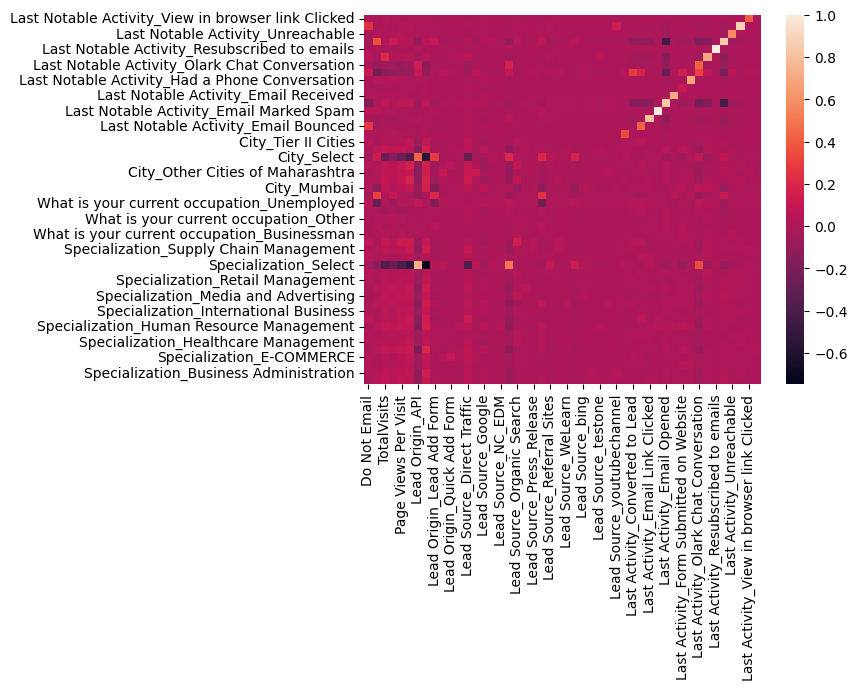

In [40]:
sns.heatmap(correlation_matrix,annot=False)


# Model creation

## Data prepareation

In [41]:
# data prep
# X and Y Split
X=leadScrDf.drop(['Converted'],axis=1)
y=leadScrDf['Converted']
#Converted is the target

In [42]:
# test and train split
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(X,y,train_size=0.9,random_state=83)

In [43]:
leadScrDf[contCols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.246320,487.698268,2.357440
std,2.942818,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,12.000000,2272.000000,55.000000


In [44]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
xTrain[contCols]=scalar.fit_transform(xTrain[contCols])
xTrain.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8357,1,0.250000,0.122359,0.125000,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4355,0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3827,0,0.166667,0.559419,0.083333,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5591,0,0.166667,0.759683,0.083333,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9166,0,0.333333,0.058099,0.055417,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [45]:
leadScrDf[contCols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.246320,487.698268,2.357440
std,2.942818,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,12.000000,2272.000000,55.000000


## Train Logistic regressing

In [46]:
# Automating feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(xTrain,yTrain)

In [47]:
list(zip(xTrain.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 44),
 ('Lead Origin_API', False, 26),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 46),
 ('Lead Source_Click2call', False, 23),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Live Chat', False, 57),
 ('Lead Source_NC_EDM', False, 36),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 50),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', False, 69),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Social Media', False, 30),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Websit

In [48]:
xTrain.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Approached upfront',
       'Specialization_Select', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [49]:
# defining functions because we are going to use them iteratively
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

def trainModel(indep,dep):
    indepSM=sm.add_constant(indep)
    lr = sm.GLM(dep,indepSM,family=sm.families.Binomial())
    return (lr.fit(),indepSM)

def vifCal(dep):
    vif = pd.DataFrame()
    vif['features']=dep.columns
    vif['VIF']=[variance_inflation_factor(dep.values,i) for i in range(dep.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    return vif.sort_values(by="VIF",ascending=False)

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [50]:
xTrain=xTrain[xTrain.columns[rfe.support_]]

In [51]:
# model 1
lr_mod1,xTrain1=trainModel(xTrain,yTrain)

In [52]:
lr_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 8316
Model:                            GLM   Df Residuals:                     8300
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3479.1
Date:                Tue, 17 Sep 2024   Deviance:                       6958.3
Time:                        20:56:51   Pearson chi2:                 8.85e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.3904
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7415      0.113      6.561      0.000       0.520       0.963
Do Not Email                                            -1.6100      0.149    -10.826      0.000      -1.901      -1.319
Total Time Spent on Website                              4.0437      0.132     30.595      0.000       3.785       4.303
Lead Origin_Landing Page Submission                     -1.4061      0.103    -13.593      0.000      -1.609      -1.203
Lead Origin_Lead Add Form                                2.8960      0.181     15.981      0.000       2.541       3.251
Lead Source_Welingak Website                            24.1170   1.78e+04      0.001      0.999   -3.49e+04    3.49e+04
Last Activity_Approached upfront                        26.2840   6.01e+04      0.000      1.000   -1.18e+05    1.18e+05
Specialization_Select                                   -1.1323      0.105    -10.760      0.000      -1.339      -0.926
What is your current occupation_Housewife               25.8144   5.65e+04      0.000      1.000   -1.11e+05    1.11e+05
What is your current occupation_Working Professional     2.4679      0.165     14.959      0.000       2.145       2.791
Last Notable Activity_Email Link Clicked                -1.8034      0.232     -7.777      0.000      -2.258      -1.349
Last Notable Activity_Email Opened                      -1.4128      0.077    -18.276      0.000      -1.564      -1.261
Last Notable Activity_Had a Phone Conversation          24.2839   5.05e+04      0.000      1.000   -9.89e+04     9.9e+04
Last Notable Activity_Modified                          -2.0637      0.081    -25.465      0.000      -2.222      -1.905
Last Notable Activity_Olark Chat Conversation           -2.5465      0.294     -8.662      0.000      -3.123      -1.970
Last Notable Activity_Page Visited on Website           -1.6779      0.172     -9.762      0.000      -2.015      -1.341
========================================================================================================================
"""

In [53]:
vif1=vifCal(xTrain)

In [54]:
vif1

,features,VIF
2,Lead Origin_Landing Page Submission,2.81
12,Last Notable Activity_Modified,2.09
6,Specialization_Select,2.03
1,Total Time Spent on Website,1.86
10,Last Notable Activity_Email Opened,1.86
3,Lead Origin_Lead Add Form,1.43
4,Lead Source_Welingak Website,1.29
8,What is your current occupation_Working Professional,1.17
0,Do Not Email,1.15
14,Last Notable Activity_Page Visited on Website,1.10


In [55]:
# model 2
# dropping What is your current occupation_Housewife
xTrain=xTrain.drop("What is your current occupation_Housewife",axis=1)
lr_mod2,xTrain2=trainModel(xTrain,yTrain)
vif2=vifCal(xTrain)

In [56]:
lr_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 8316
Model:                            GLM   Df Residuals:                     8301
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3486.6
Date:                Tue, 17 Sep 2024   Deviance:                       6973.1
Time:                        20:56:51   Pearson chi2:                 8.87e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.3893
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7414      0.113      6.564      0.000       0.520       0.963
Do Not Email                                            -1.6125      0.149    -10.845      0.000      -1.904      -1.321
Total Time Spent on Website                              4.0416      0.132     30.610      0.000       3.783       4.300
Lead Origin_Landing Page Submission                     -1.4031      0.103    -13.580      0.000      -1.606      -1.201
Lead Origin_Lead Add Form                                2.9072      0.181     16.060      0.000       2.552       3.262
Lead Source_Welingak Website                            24.1057   1.78e+04      0.001      0.999   -3.49e+04    3.49e+04
Last Activity_Approached upfront                        26.2801      6e+04      0.000      1.000   -1.18e+05    1.18e+05
Specialization_Select                                   -1.1363      0.105    -10.807      0.000      -1.342      -0.930
What is your current occupation_Working Professional     2.4621      0.165     14.927      0.000       2.139       2.785
Last Notable Activity_Email Link Clicked                -1.7966      0.231     -7.776      0.000      -2.249      -1.344
Last Notable Activity_Email Opened                      -1.4077      0.077    -18.224      0.000      -1.559      -1.256
Last Notable Activity_Had a Phone Conversation          24.2820   5.05e+04      0.000      1.000   -9.89e+04     9.9e+04
Last Notable Activity_Modified                          -2.0575      0.081    -25.416      0.000      -2.216      -1.899
Last Notable Activity_Olark Chat Conversation           -2.5436      0.294     -8.652      0.000      -3.120      -1.967
Last Notable Activity_Page Visited on Website           -1.6779      0.172     -9.763      0.000      -2.015      -1.341
========================================================================================================================
"""

In [57]:
vif2

,features,VIF
2,Lead Origin_Landing Page Submission,2.81
11,Last Notable Activity_Modified,2.09
6,Specialization_Select,2.02
1,Total Time Spent on Website,1.86
9,Last Notable Activity_Email Opened,1.86
3,Lead Origin_Lead Add Form,1.43
4,Lead Source_Welingak Website,1.29
7,What is your current occupation_Working Professional,1.17
0,Do Not Email,1.15
13,Last Notable Activity_Page Visited on Website,1.10


In [58]:
# model 3
# dropping Last Activity_Approached upfront
xTrain=xTrain.drop("Last Activity_Approached upfront",axis=1)
lr_mod3,xTrain3=trainModel(xTrain,yTrain)
vif3=vifCal(xTrain)

In [59]:
lr_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 8316
Model:                            GLM   Df Residuals:                     8302
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3493.7
Date:                Tue, 17 Sep 2024   Deviance:                       6987.5
Time:                        20:56:51   Pearson chi2:                 8.89e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7380      0.113      6.539      0.000       0.517       0.959
Do Not Email                                            -1.6158      0.149    -10.872      0.000      -1.907      -1.325
Total Time Spent on Website                              4.0424      0.132     30.651      0.000       3.784       4.301
Lead Origin_Landing Page Submission                     -1.3999      0.103    -13.558      0.000      -1.602      -1.198
Lead Origin_Lead Add Form                                2.9123      0.181     16.119      0.000       2.558       3.266
Lead Source_Welingak Website                            24.0950   1.78e+04      0.001      0.999   -3.49e+04    3.49e+04
Specialization_Select                                   -1.1305      0.105    -10.761      0.000      -1.336      -0.925
What is your current occupation_Working Professional     2.4593      0.165     14.917      0.000       2.136       2.782
Last Notable Activity_Email Link Clicked                -1.7972      0.231     -7.779      0.000      -2.250      -1.344
Last Notable Activity_Email Opened                      -1.4082      0.077    -18.233      0.000      -1.560      -1.257
Last Notable Activity_Had a Phone Conversation          24.2824   5.05e+04      0.000      1.000   -9.89e+04     9.9e+04
Last Notable Activity_Modified                          -2.0481      0.081    -25.348      0.000      -2.206      -1.890
Last Notable Activity_Olark Chat Conversation           -2.5449      0.294     -8.658      0.000      -3.121      -1.969
Last Notable Activity_Page Visited on Website           -1.6781      0.172     -9.764      0.000      -2.015      -1.341
========================================================================================================================
"""

In [60]:
vif3

,features,VIF
2,Lead Origin_Landing Page Submission,2.81
10,Last Notable Activity_Modified,2.09
5,Specialization_Select,2.02
1,Total Time Spent on Website,1.86
8,Last Notable Activity_Email Opened,1.86
3,Lead Origin_Lead Add Form,1.42
4,Lead Source_Welingak Website,1.28
6,What is your current occupation_Working Professional,1.17
0,Do Not Email,1.15
12,Last Notable Activity_Page Visited on Website,1.10


In [61]:
# model 4
# dropping Last Notable Activity_Had a Phone Conversation
xTrain=xTrain.drop("Last Notable Activity_Had a Phone Conversation",axis=1)
lr_mod4,xTrain4=trainModel(xTrain,yTrain)
vif4=vifCal(xTrain)

In [62]:
lr_mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 8316
Model:                            GLM   Df Residuals:                     8303
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3497.3
Date:                Tue, 17 Sep 2024   Deviance:                       6994.7
Time:                        20:56:52   Pearson chi2:                 8.90e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7505      0.113      6.662      0.000       0.530       0.971
Do Not Email                                            -1.6220      0.149    -10.911      0.000      -1.913      -1.331
Total Time Spent on Website                              4.0405      0.132     30.647      0.000       3.782       4.299
Lead Origin_Landing Page Submission                     -1.4017      0.103    -13.591      0.000      -1.604      -1.200
Lead Origin_Lead Add Form                                2.9102      0.181     16.104      0.000       2.556       3.264
Lead Source_Welingak Website                            24.0969   1.78e+04      0.001      0.999   -3.48e+04    3.49e+04
Specialization_Select                                   -1.1357      0.105    -10.820      0.000      -1.341      -0.930
What is your current occupation_Working Professional     2.4575      0.165     14.904      0.000       2.134       2.781
Last Notable Activity_Email Link Clicked                -1.8064      0.231     -7.819      0.000      -2.259      -1.354
Last Notable Activity_Email Opened                      -1.4175      0.077    -18.372      0.000      -1.569      -1.266
Last Notable Activity_Modified                          -2.0567      0.081    -25.475      0.000      -2.215      -1.898
Last Notable Activity_Olark Chat Conversation           -2.5528      0.294     -8.684      0.000      -3.129      -1.977
Last Notable Activity_Page Visited on Website           -1.6870      0.172     -9.818      0.000      -2.024      -1.350
========================================================================================================================
"""

In [63]:
vif4

,features,VIF
2,Lead Origin_Landing Page Submission,2.81
9,Last Notable Activity_Modified,2.09
5,Specialization_Select,2.02
8,Last Notable Activity_Email Opened,1.86
1,Total Time Spent on Website,1.85
3,Lead Origin_Lead Add Form,1.42
4,Lead Source_Welingak Website,1.28
6,What is your current occupation_Working Professional,1.17
0,Do Not Email,1.15
11,Last Notable Activity_Page Visited on Website,1.10


In [64]:
# model 5
# dropping Lead Source_Welingak Website
xTrain=xTrain.drop("Lead Source_Welingak Website",axis=1)
lr_mod5,xTrain5=trainModel(xTrain,yTrain)
vif5=vifCal(xTrain)

In [65]:
lr_mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 8316
Model:                            GLM   Df Residuals:                     8304
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3518.7
Date:                Tue, 17 Sep 2024   Deviance:                       7037.3
Time:                        20:56:52   Pearson chi2:                 9.74e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6925      0.112      6.162      0.000       0.472       0.913
Do Not Email                                            -1.6146      0.147    -10.948      0.000      -1.904      -1.326
Total Time Spent on Website                              4.0372      0.132     30.626      0.000       3.779       4.296
Lead Origin_Landing Page Submission                     -1.3467      0.103    -13.098      0.000      -1.548      -1.145
Lead Origin_Lead Add Form                                3.4439      0.175     19.703      0.000       3.101       3.786
Specialization_Select                                   -1.0650      0.105    -10.151      0.000      -1.271      -0.859
What is your current occupation_Working Professional     2.4519      0.165     14.867      0.000       2.129       2.775
Last Notable Activity_Email Link Clicked                -1.8079      0.231     -7.832      0.000      -2.260      -1.355
Last Notable Activity_Email Opened                      -1.4122      0.077    -18.338      0.000      -1.563      -1.261
Last Notable Activity_Modified                          -2.0548      0.081    -25.503      0.000      -2.213      -1.897
Last Notable Activity_Olark Chat Conversation           -2.5241      0.288     -8.755      0.000      -3.089      -1.959
Last Notable Activity_Page Visited on Website           -1.6790      0.171     -9.805      0.000      -2.015      -1.343
========================================================================================================================
"""

In [66]:
vif5

,features,VIF
2,Lead Origin_Landing Page Submission,2.79
8,Last Notable Activity_Modified,2.07
4,Specialization_Select,1.98
1,Total Time Spent on Website,1.85
7,Last Notable Activity_Email Opened,1.85
0,Do Not Email,1.15
3,Lead Origin_Lead Add Form,1.15
5,What is your current occupation_Working Professional,1.15
10,Last Notable Activity_Page Visited on Website,1.10
9,Last Notable Activity_Olark Chat Conversation,1.08


We have very less columns now and the p-value and VIF seem to be in an acceptable range

In [67]:
yTrainPred=lr_mod5.predict(xTrain5)
yTrainPred[:10]

8357    0.021258
4355    0.143724
3827    0.832629
5591    0.917805
9166    0.465577
1322    0.172973
901     0.455926
627     0.170998
5127    0.419904
394     0.106500
dtype: float64

In [68]:
yTrainPred=yTrainPred.values.reshape(-1)
yTrainPred[:10]

array([0.02125798, 0.14372424, 0.83262905, 0.91780454, 0.46557671,
       0.17297297, 0.4559262 , 0.17099801, 0.41990438, 0.10649965])

In [69]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

yTrainPredFinal = pd.DataFrame({'Converted':yTrain.values, 'Conversion_Prob':yTrainPred})
yTrainPredFinal.head(10)

,Converted,Conversion_Prob
0,0,0.021258
1,0,0.143724
2,1,0.832629
3,1,0.917805
4,0,0.465577
5,0,0.172973
6,1,0.455926
7,0,0.170998
8,1,0.419904
9,0,0.106500


In [70]:
# let's create columns with different cutoffs
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    yTrainPredFinal[i]=yTrainPredFinal.Conversion_Prob.map(lambda x : 1 if x>i else 0)
yTrainPredFinal.head()

,Converted,Conversion_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.021258,1,0,0,0,0,0,0,0,0,0
1,0,0.143724,1,1,0,0,0,0,0,0,0,0
2,1,0.832629,1,1,1,1,1,1,1,1,1,0
3,1,0.917805,1,1,1,1,1,1,1,1,1,1
4,0,0.465577,1,1,1,1,1,0,0,0,0,0


In [71]:
# Let's check what's a good cut-off
from sklearn.metrics import confusion_matrix

cutoffDf=pd.DataFrame(columns=['cut-off','acc','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(yTrainPredFinal.Converted, yTrainPredFinal[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoffDf.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoffDf)

     cut-off       acc  sensitivity  specificity
0.0      0.0  0.383718     1.000000     0.000000
0.1      0.1  0.576359     0.964275     0.334829
0.2      0.2  0.764671     0.895017     0.683512
0.3      0.3  0.797018     0.853651     0.761756
0.4      0.4  0.805916     0.783453     0.819902
0.5      0.5  0.804353     0.663742     0.891902
0.6      0.6  0.798220     0.588844     0.928585
0.7      0.7  0.783670     0.513945     0.951610
0.8      0.8  0.760943     0.420244     0.973073
0.9      0.9  0.715368     0.276089     0.988878


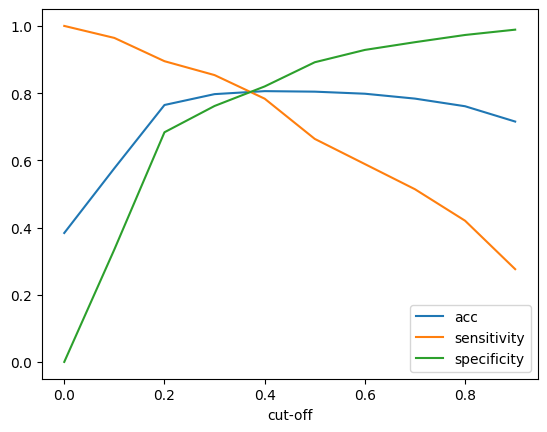

In [72]:
# We'll change the cutoff accourding to our requirements
#But let's find a good place to start
cutoffDf.plot.line(x='cut-off',y=['acc','sensitivity','specificity'])
plt.show()

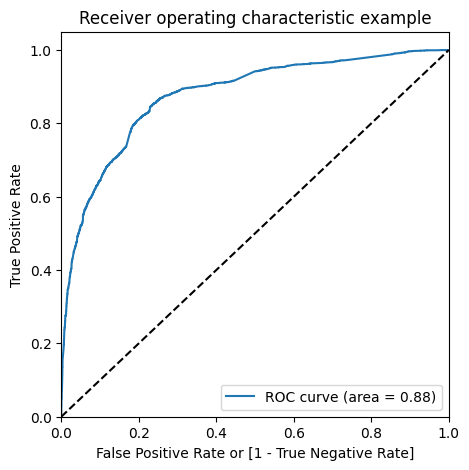

In [73]:
draw_roc(yTrainPredFinal.Converted,yTrainPredFinal.Conversion_Prob)

In [74]:
# 0.35 seems like a good place to start evaluating the model
# From the above table and graph we can tell 0.3 is the best cut-off to take.
# at 0.3 we have the highest accuracy and a very good sensitivity
# We'll keep it slightly biased towards higher sensitvity because, we'll like to capture more sales even at a little cost of reduced specificity
cutoff=0.3
yTrainPredFinal['Predicted']=yTrainPredFinal.Conversion_Prob.map(lambda x : 1 if x>cutoff else 0)
confusion=metrics.confusion_matrix(yTrainPredFinal.Converted,yTrainPredFinal.Predicted)

In [75]:
print(confusion)

[[3904 1221]
 [ 467 2724]]


### ROC curve

## evaluating on test

In [76]:
#prep test input
xTest[contCols]=scalar.transform(xTest[contCols])

In [77]:

xTest=xTest[xTrain.columns]

In [78]:
xTestSM=sm.add_constant(xTest)

In [79]:
yTestPred=lr_mod5.predict(xTestSM)

In [80]:
yTestPred=yTestPred.values.reshape(-1)
yTestPredFinal = pd.DataFrame({'Converted':yTest.values, 'Conversion_Prob':yTestPred})

In [81]:
yTestPredFinal['Predicted']=yTestPredFinal.Conversion_Prob.map(lambda x : 1 if x>cutoff else 0)

In [82]:
cm1 = metrics.confusion_matrix(yTestPredFinal.Converted, yTestPredFinal['Predicted'] )
total1=sum(sum(cm1))
accuracy = (cm1[0,0]+cm1[1,1])/total1    
speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
cutoffDf.loc['TestPred'] =[ cutoff ,accuracy,sensi,speci]


# Result

In [83]:
cutoffDf.loc[['TestPred',cutoff]]

,cut-off,acc,sensitivity,specificity
TestPred,0.3,0.811688,0.859459,0.779783
0.3,0.3,0.797018,0.853651,0.761756


In [84]:
#Confusion matrix
confusion=metrics.confusion_matrix(yTestPredFinal.Converted,yTestPredFinal.Predicted)
print(confusion)

[[432 122]
 [ 52 318]]


The solution requires us to give a 0-100 score, we can do this by multiplying the probabily by 100
We can add this to the test dataframe as below:

In [85]:
#we'll round it up to the nearest integer to make it easier to look at
yTestPredFinal['leadScore']=pd.DataFrame(round(yTestPredFinal.Conversion_Prob*100),dtype=int)
yTestPredFinal[['leadScore','Converted']].head(10)

,leadScore,Converted
0,62,0
1,32,0
2,6,0
3,7,0
4,8,0
5,71,1
6,73,1
7,30,1
8,12,0
9,19,1
